###Note: RDDL is intended to compactly support the representation of a wide range of relational MDPs and POMDPs and support the efficient simulation of these domains. 

At present, there are two options to obtain the pyRDDLGym infrstructure:

1. !pip install pyrddlgym==1.0.4
2. !git clone https://github.com/ataitler/pyRDDLGym.git

In [1]:
!git clone https://github.com/ataitler/pyRDDLGym.git

Cloning into 'pyRDDLGym'...
remote: Enumerating objects: 9104, done.
remote: Counting objects: 100% (2198/2198), done.
remote: Compressing objects: 100% (727/727), done.
remote: Total 9104 (delta 1593), reused 2057 (delta 1466), pack-reused 6906
Receiving objects: 100% (9104/9104), 7.31 MiB | 11.29 MiB/s, done.
Resolving deltas: 100% (6053/6053), done.


#BASIC USAGE
###Initializing environment in pyRDDLGym

In [2]:
%cd /content/pyRDDLGym

/content/pyRDDLGym


In [3]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 6.7 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


In [4]:
#Importing the RDDLEnv module from the pyRDDLGym package
from pyRDDLGym import RDDLEnv

/content/pyRDDLGym/pyRDDLGym/Examples/ExampleManager.py:88: DeprecationWarning: invalid escape sequence \d
  x = re.search("instance\d+.*", file)


💡 Lesson Learnt: The package could be installed, but not in the current working directory: Make sure that the pyRDDLGym package is installed in the current working directory or in a directory that is in the Python path.

In [5]:
#Instantiating RDDLEnv

myEnv = RDDLEnv.RDDEnv(domain = domain.rddl, instance=instance.rddl)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AttributeError: ignored

💡 the domain.rddl and instance.rddl files need to be replaced with the actual paths to the RDDL files we want to use.

the rddl files are located in the pyRDDLGym distribution (/content/pyRDDLGym/pyRDDLGym/Examples)

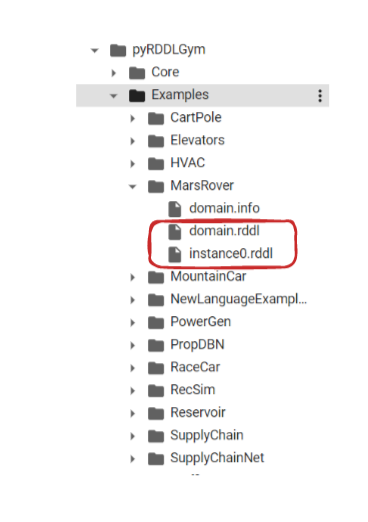

#BUILT-IN ENVIRONMENTS

In [7]:
from pyRDDLGym import ExampleManager

In [8]:
#list all the available example environments in pyRDDLGym
ExampleManager.ListExamples()

Available example environment(s):


####To retrive the informaiton of a specific environment use the following mtd:

In [9]:
ENV = "HVAC"        #ENV-->string name of the desired example environment
EnvInfo = ExampleManager.GetEnvInfo(ENV)

/content/pyRDDLGym/pyRDDLGym/Examples /content/pyRDDLGym/pyRDDLGym/Examples/manifest.csv
Available example environment(s):
MarsRover -> Multi Rover Navigation, where a group of agent needs to harvest mineral.
MountainCar -> A simple continuous MDP for the classical mountain car control problem.
CartPole continuous -> A simple continuous state-action MDP for the classical cart-pole system by Rich Sutton, with actions that describe the continuous force applied to the cart.
CartPole discrete -> A simple continuous state MDP for the classical cart-pole system by Rich Sutton, with discrete actions that apply a constant force on either the left or right side of the cart.
Wildfire -> A boolean version of the wildfire fighting domain.
NewtonZero -> Example with Newton root-finding method.
NewLanguage -> Example with new language features.
PropDBN -> Simple propositional DBN.
Elevators -> The Elevator domain models evening rush hours when people from different floors in a building want to go do

In [10]:
myEnv = RDDLEnv.RDDLEnv(domain=EnvInfo.get_domain(), instance=EnvInfo.get_instance(0))

Generating LALR tables


💡   Overall, this line of code creates an RDDL environment object that uses a specific RDDL domain and problem instance file to define the environment's structure and initial state.


- Where the argument of the method get_instance(<num>) is the ID number of the instance (0 in this case).

####ALTERNATIVELY

In [11]:
env = RDDLEnv.RDDLEnv(domain = "/content/pyRDDLGym/pyRDDLGym/Examples/HVAC/domain.rddl", instance ="/content/pyRDDLGym/pyRDDLGym/Examples/HVAC/instance0.rddl" )

Is this correct??? I guess so!

In [12]:
#Listing all the available instances of the problem
EnvInfo.list_instances()

['instance0.rddl', 'instance1.rddl', 'instance2.rddl']

In [13]:
#Setting up the dedicated visualizer 
myEnv.set_visualizer(EnvInfo.get_visualizer())

#Interacting with the Environment
pyRDDLGym is build on Gym as so implements the classic “agent-environment loop”. The infrastructure comes with two simple agents:

- NoOpAgent - which allows the environment to evolve according to the default behavior as specified in the RDDL file.
- RandomAgent - which sends a rendom action according to the env.action_space and the maximum number of allowed concurrent actions as specified in the RDDL file.

Cool commands:
- !pip list
- !pip show Policies
- !pip freeze | grep Policies    ----> returns nothing, that means Policies isn't installed

In [14]:
from pyRDDLGym.Policies.Agents import RandomAgent
agent = RandomAgent(action_space=myEnv.action_space, num_actions=myEnv.NumConcurrentActions)

AttributeError: ignored

#How to debug this?

Follow along


In [15]:
myEnv.action_space

Dict('fan-in___z1': Box(0.05, inf, (1,), float32), 'heat-input___h1': Box(-inf, inf, (1,), float32))

In [17]:
#print out a list of all the attributes and methods of the myEnv object
print(dir(myEnv))

['Budget', '__annotations__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_is_protocol', '_movie_generator', '_movie_per_episode', '_movies', '_np_random', '_visualizer', 'action_space', 'actionsranges', 'budget', 'close', 'currentH', 'defaultAction', 'discount', 'domain_text', 'done', 'enforce_action_constraints', 'horizon', 'image', 'image_size', 'instance_text', 'max_allowed_actions', 'metadata', 'model', 'non_fluents', 'np_random', 'numConcurrentActions', 'observation_space', 'pilImageToSurface', 'render', 'render_mode', 'reset', 'reward_range', 'sampler', 'seed', 'set_visualizer', 'simlogger'

numConcurrentActions is present!! 

It seems like the variable name numConcurrentActions is not defined properly, particularly the casinf of the letter n is incorrect, we need to replace NumConcurrentActions with numConcurrentActions

In [18]:
from pyRDDLGym.Policies.Agents import RandomAgent
agent = RandomAgent(action_space=myEnv.action_space, num_actions=myEnv.numConcurrentActions)

#Agent-environment loop in pyRDDLGym

- Example: MarsRover

- The loop will run for the amount of time steps specified in the environment’s horizon field.

- If the env.render() function will be used we will also see a window pop up rendering the environment

In [19]:
!apt install -y xvfb python-opengl 
!pip install gym pyvirtualdisplay 
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  freeglut3 libfontenc1 libpython2-stdlib libxfont2 libxkbfile1 python2
  python2-minimal x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common
Suggested packages:
  python-tk python-numpy libgle3 python2-doc
The following NEW packages will be installed:
  freeglut3 libfontenc1 libpython2-stdlib libxfont2 libxkbfile1 python-opengl
  python2 python2-minimal x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common xvfb
0 upgraded, 14 newly installed, 0 to remove and 24 not upgraded.
Need to get 8,318 kB of archives.
After this operation, 18.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 python2-minimal amd64 2.7.17-2ubuntu4 [27.5 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 libpython2-stdlib amd64 2.7.17-2ubuntu4 [7,072 B]
Get:3 htt

In [20]:
from pyRDDLGym import RDDLEnv
from pyRDDLGym import ExampleManager
from pyRDDLGym.Policies.Agents import RandomAgent

# get the environment info
EnvInfo = ExampleManager.GetEnvInfo('MarsRover')

# set up the environment class, choose instance 0 because every example has at least one example instance
myEnv = RDDLEnv.RDDLEnv(domain=EnvInfo.get_domain(), instance=EnvInfo.get_instance(0))
# set up the environment visualizer
myEnv.set_visualizer(EnvInfo.get_visualizer())

# set up an aget
agent = RandomAgent(action_space=myEnv.action_space, num_actions=myEnv.numConcurrentActions)

total_reward = 0
state = myEnv.reset()
for _ in range(myEnv.horizon):
      myEnv.render()
      next_state, reward, done, info = myEnv.step(agent.sample_action())
      total_reward += reward
      state = next_state
      if done:
            break
myEnv.close()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Spaces

In [21]:
print(f"Action Space: {myEnv.action_space}")

Action Space: Dict('power-x___d1': Box(-0.05, 0.05, (1,), float32), 'power-x___d2': Box(-0.05, 0.05, (1,), float32), 'power-y___d1': Box(-0.05, 0.05, (1,), float32), 'power-y___d2': Box(-0.05, 0.05, (1,), float32), 'harvest___d1': Discrete(2), 'harvest___d2': Discrete(2))


In [22]:
print(f"Observation Space: {myEnv.observation_space}")

Observation Space: Dict('vel-x___d1': Box(-inf, inf, (1,), float32), 'vel-x___d2': Box(-inf, inf, (1,), float32), 'pos-x___d1': Box(-inf, inf, (1,), float32), 'pos-x___d2': Box(-inf, inf, (1,), float32), 'vel-y___d1': Box(-inf, inf, (1,), float32), 'vel-y___d2': Box(-inf, inf, (1,), float32), 'pos-y___d1': Box(-inf, inf, (1,), float32), 'pos-y___d2': Box(-inf, inf, (1,), float32), 'mineral-harvested___m1': Discrete(2), 'mineral-harvested___m2': Discrete(2))


💡 The state and action spaces of pyRDDLGym are standard gym.spaces, and inquireable througth the standard API: env.state_space and env.action_space. State/action spaces are of type gym.spaces.Dict, where each key-value pair where the key name is the state/action and the value is the state/action current value or action to apply.

Thus, RDDL types are converted to gym.spaces with the appropriate bounds as specified in the RDDL action-preconditions and state-invariants fields. The conversion is as following:

- real -> Box with bounds as specified in action-preconditions, or with np.inf and symetric bounds.
- int -> Discrete with bounds as specified in action-preconditions, or with np.inf and symetric bounds.
- bool -> Discrete(2)

In [23]:
from pyRDDLGym import RDDLEnv
from pyRDDLGym import ExampleManager

EnvInfo = ExampleManager.GetEnvInfo('MarsRover')
myEnv = RDDLEnv.RDDLEnv(domain=EnvInfo.get_domain(), instance=EnvInfo.get_instance(0))

# set up the environment visualizer
myEnv.set_visualizer(EnvInfo.get_visualizer())

In [26]:
from pyRDDLGym import RDDLEnv
from pyRDDLGym.Visualizer.ChartViz import ChartVisualizer

myEnv = RDDLEnv.RDDLEnv(domain='/content/pyRDDLGym/pyRDDLGym/Examples/HVAC/domain.rddl', instance='/content/pyRDDLGym/pyRDDLGym/Examples/HVAC/instance0.rddl')

# set up the graphical visualizer
myEnv.set_visualizer(ChartVisualizer)